In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from pingouin import corr
import dataframe_image as dfi
import seaborn as sns

### Bayern

In [2]:
bm_df = pd.read_csv('bayernData.csv')

In [4]:
bm_df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
bm_df.head()

,short_name,age,dob,club_name,overall,MonthName,MonthNumber,DayOfYear
0,R. Lewandowski,31,1988-08-21,FC Bayern München,91,August,8,234
1,M. Neuer,34,1986-03-27,FC Bayern München,89,March,3,86
2,J. Kimmich,25,1995-02-08,FC Bayern München,88,February,2,39
3,T. Müller,30,1989-09-13,FC Bayern München,86,September,9,256
4,L. Sané,24,1996-01-11,FC Bayern München,85,January,1,11


C:\Users\mauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Numerical value of Month')

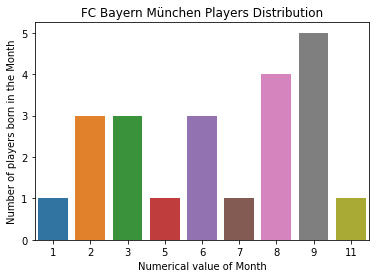

In [20]:
sns.countplot(bm_df['MonthNumber'])
plt.title('FC Bayern München Players Distribution')
plt.ylabel('Number of players born in the Month')
plt.xlabel('Numerical value of Month')

In [27]:
bayernMonthNumber = bm_df.groupby('MonthNumber')['MonthNumber'].count()
bayernMonthdf = pd.DataFrame([[i, bayernMonthNumber[i]] for i in bayernMonthNumber.index])
bayernMonthdf.rename(columns={0:'Month', 1: 'Total Players'}, inplace=True)
bayernMonthdf

,Month,Total Players
0,1,1
1,2,3
2,3,3
3,5,1
4,6,3
5,7,1
6,8,4
7,9,5
8,11,1


In [25]:
X = bayernMonthdf['Month']
Y = bayernMonthdf['Total Players']

Text(1.05, 0.95, '$y=0.077\\;x+2.000$\n$R^2 = 0.029$')

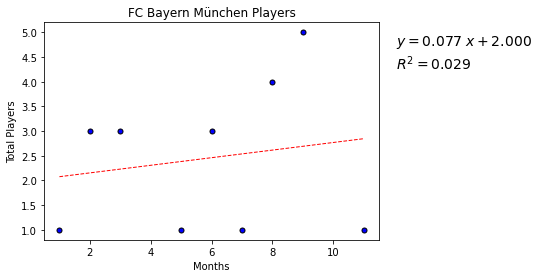

In [26]:
plt.title('FC Bayern München Players')
plt.ylabel('Total Players')
plt.xlabel('Months')
plt.plot(X,Y,"b.", ms=10, mec="k")
z = np.polyfit(X, Y, 1)
y_hat = np.poly1d(z)(X)

plt.plot(X, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

In [34]:
dfi.export(bayernMonthdf[['Month', 'Total Players']].corr(), 'bayerncorr.png')

### Liverpool

In [11]:
lp_df = pd.read_csv('liverpoolData.csv')

In [14]:
lp_df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
lp_df.head()

,short_name,age,dob,club_name,overall,MonthName,MonthNumber,DayOfYear
0,V. van Dijk,28,1991-07-08,Liverpool,90,July,7,189
1,Alisson,27,1992-10-02,Liverpool,90,October,10,276
2,S. Mané,28,1992-04-10,Liverpool,90,April,4,101
3,M. Salah,28,1992-06-15,Liverpool,90,June,6,167
4,T. Alexander-Arnold,21,1998-10-07,Liverpool,87,October,10,280


C:\Users\mauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Numerical value of Month')

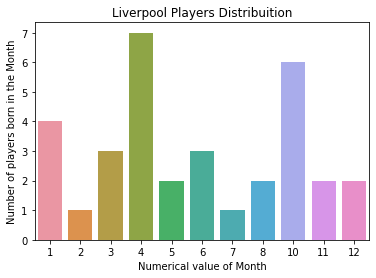

In [19]:
sns.countplot(lp_df['MonthNumber'])
plt.title('Liverpool Players Distribuition')
plt.ylabel('Number of players born in the Month')
plt.xlabel('Numerical value of Month')

In [30]:
liverpoolMonthNumber = lp_df.groupby('MonthNumber')['MonthNumber'].count()
liverpoolMonthdf = pd.DataFrame([[i, liverpoolMonthNumber[i]] for i in liverpoolMonthNumber.index])
liverpoolMonthdf.rename(columns={0:'Month', 1: 'Total Players'}, inplace=True)
liverpoolMonthdf

,Month,Total Players
0,1,4
1,2,1
2,3,3
3,4,7
4,5,2
5,6,3
6,7,1
7,8,2
8,10,6
9,11,2


In [31]:
X = liverpoolMonthdf['Month']
Y = liverpoolMonthdf['Total Players']

Text(1.05, 0.95, '$y=-0.051\\;x+3.322$\n$R^2 = 0.009$')

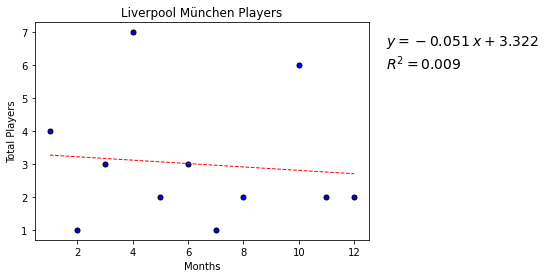

In [32]:
plt.title('Liverpool München Players')
plt.ylabel('Total Players')
plt.xlabel('Months')
plt.plot(X,Y,"b.", ms=10, mec="k")
z = np.polyfit(X, Y, 1)
y_hat = np.poly1d(z)(X)

plt.plot(X, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

In [35]:
dfi.export(liverpoolMonthdf[['Month', 'Total Players']].corr(), 'liverpoolcorr.png')